In [10]:
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 3.5]
import seaborn as sns
import sys, os
from sklearn.metrics import mean_squared_error

# Local Imports
curdir = os.getcwd()
print(curdir)
sys.path.insert(0, curdir+"/../Functions")
# My built function imports
from data_functions import *
from plotting_functions import *

/Users/mawa7160/Library/CloudStorage/OneDrive-UCB-O365/Documents/GitHub/Hemispheric-Albedo-Project/Examples


0.1204932056916809


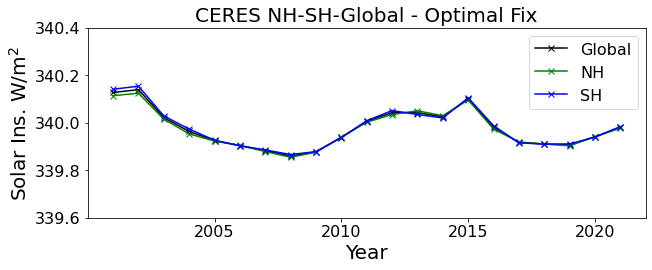

In [11]:
file_name = "/Users/mawa7160/dev/data/CERES/EBAF/CERES_EBAF-TOA_Full_2022_01.nc"
ceres_ds = xr.open_dataset(file_name)
ceres_full_years = ceres_ds
solar_optimal = create_CERES_hemisphere_data(ceres_full_years, "solar_mon", start_yr="2001", start_mon="01", 
    end_yr="2022", end_mon="01", remove_leap_year=1)
plot_hemisphere_and_global_by_year(solar_optimal, solar_optimal.year, title="CERES NH-SH-Global - Optimal Fix", fixed_ylim=True, set_short_x_ticks=True)
print(mean_squared_error(solar_optimal['global'], solar_optimal['nh'])/solar_optimal["global"].mean().data*1000000)

311.0780006993981


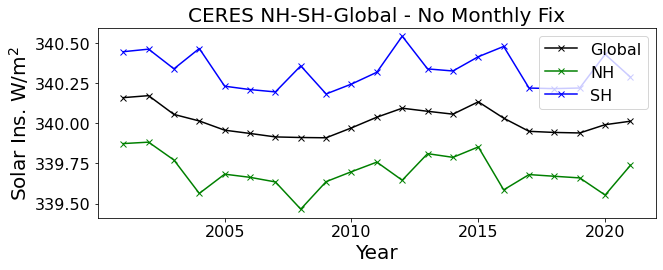

In [12]:
solar_worst = create_CERES_hemisphere_data(ceres_full_years, "solar_mon", start_yr="2001", start_mon="01", 
    end_yr="2022", end_mon="01", remove_leap_year=-1)
plot_hemisphere_and_global_by_year(solar_worst, solar_worst.year, title="CERES NH-SH-Global - No Monthly Fix", fixed_ylim=False, set_short_x_ticks=True)
print(mean_squared_error(solar_worst['global'], solar_worst['nh'])/solar_worst["global"].mean().data*1000000)

77.2445927245048


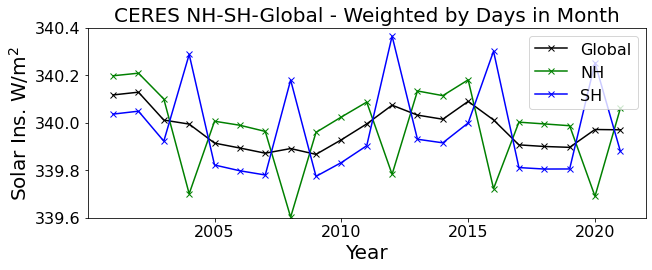

In [14]:
solar_ok = create_CERES_hemisphere_data(ceres_full_years, "solar_mon", start_yr="2001", start_mon="01", 
    end_yr="2022", end_mon="01", remove_leap_year=0)
plot_hemisphere_and_global_by_year(solar_ok, solar_ok.year, title="CERES NH-SH-Global - Weighted by Days in Month", fixed_ylim=True, set_short_x_ticks=True)
print(mean_squared_error(solar_ok['global'], solar_ok['nh'])/solar_ok["global"].mean().data*1000000)

15.716012420388967


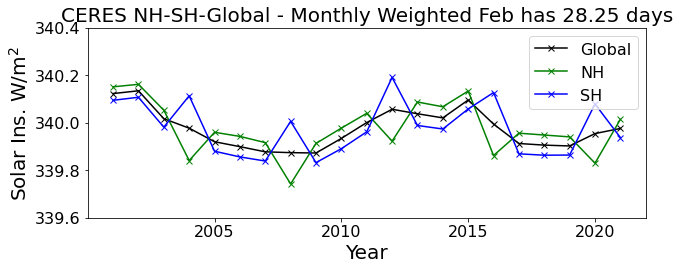

In [15]:
dataset = ceres_full_years
category = "solar_mon"
specific_dat = dataset[category]
start_yr="2001"
start_mon="01" 
end_yr="2022"
end_mon="01"
remove_leap_year=1

cleaned_dat = pick_CERES_data(specific_dat, start_yr, start_mon, end_yr, end_mon)

specific_t_weighted = apply_time_averaging(cleaned_dat, leap_year_method=remove_leap_year, 
    start_mon=start_mon, feb_leap_year_correction=28.25, 
    feb_non_leap_year_correction=28.25)

nh_ts_mean = apply_spatial_weights(specific_t_weighted, low_lat=0, high_lat=90)
sh_ts_mean = apply_spatial_weights(specific_t_weighted, low_lat=-90, high_lat=0)
all_ts_mean = apply_spatial_weights(specific_t_weighted, low_lat=-90, high_lat=90)

solar_good = xr.Dataset({"nh":nh_ts_mean, "sh":sh_ts_mean, "global":all_ts_mean})
plot_hemisphere_and_global_by_year(solar_good, solar_good.year, title="CERES NH-SH-Global - Monthly Weighted Feb has 28.25 days", fixed_ylim=True, set_short_x_ticks=True)
print(mean_squared_error(solar_good['global'], solar_good['nh'])/solar_good["global"].mean().data*1000000)

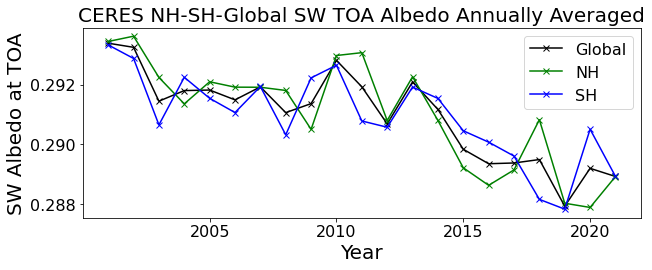

In [16]:
hemi_alb = create_CERES_hemisphere_data(ceres_full_years, "toa_sw_all_mon", start_yr="2001", start_mon="01", 
    end_yr="2022", end_mon="01", remove_leap_year=1)
plot_hemisphere_and_global_by_year(hemi_alb/solar_optimal["global"].mean().data, hemi_alb.year, title="CERES NH-SH-Global SW TOA Albedo Annually Averaged", 
    fixed_ylim=False, set_short_x_ticks=True, y_label="SW Albedo at TOA")


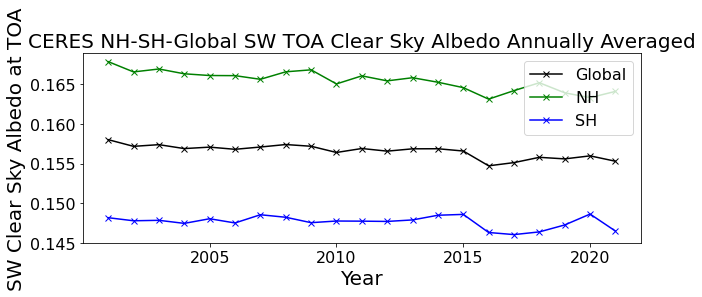

In [17]:
hemi_clear = create_CERES_hemisphere_data(ceres_full_years, "toa_sw_clr_c_mon", start_yr="2001", start_mon="01", 
    end_yr="2022", end_mon="01", remove_leap_year=1)
plot_hemisphere_and_global_by_year(hemi_clear/solar_optimal["global"].mean().data, hemi_alb.year, title="CERES NH-SH-Global SW TOA Clear Sky Albedo Annually Averaged", 
    fixed_ylim=False, set_short_x_ticks=True, y_label="SW Clear Sky Albedo at TOA")